In [2]:
%load_ext autoreload
%autoreload 2

import os
import matplotlib.pyplot as plt
import warnings
from brancharchitect.io import read_newick
from brancharchitect.distances.distances import relative_robinson_foulds_distance
from brancharchitect.distances.distance_plot_utils import (
    plot_distance_matrix,
    perform_umap,
    plot_component_umap_3d,
)
import glob
from typing import List
from brancharchitect.tree import Node

import numpy as np
warnings.filterwarnings("ignore", category=UserWarning)

def find_data_file(filename_pattern: str) -> str | None:
    """Find data file starting from current directory and going up"""
    current_dir = os.getcwd()
    # Try current directory and parent directories
    for _ in range(3):  # Go up to 3 levels
        search_paths: List[str] = [
            os.path.join(current_dir, "data", "**", filename_pattern),
            os.path.join(current_dir, "**", filename_pattern),

        ]
        for search_path in search_paths:
            matches: List[str] = glob.glob(search_path, recursive=True)
            if matches:
                return matches[0]  # Return first match
        current_dir: str = os.path.dirname(current_dir)
    return None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
trees: Node | List[Node] = read_newick(
    "/Users/berksakalli/Projects/BranchArchitect/notebooks/data/six_taxa_all_permutations.newick"
)

leaf_order: list[str] = trees[0]._order  # Assuming all trees have the same order
weighted = True  # Set to True if you want to use weighted distances
max_trees: int = min(len(trees), len(trees))  # Profile first 10 trees only
print(f"Profiling {max_trees} trees ({max_trees * (max_trees - 1) // 2} pairs)")
trees = trees[:max_trees] if isinstance(trees, list) else [trees]

Profiling 945 trees (446040 pairs)


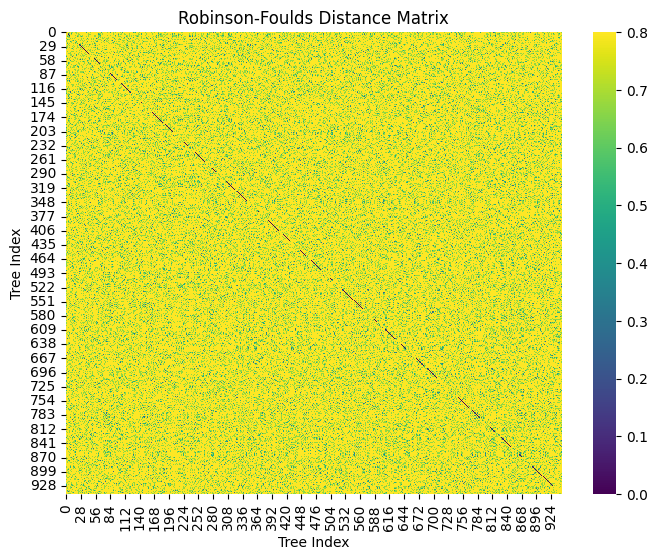

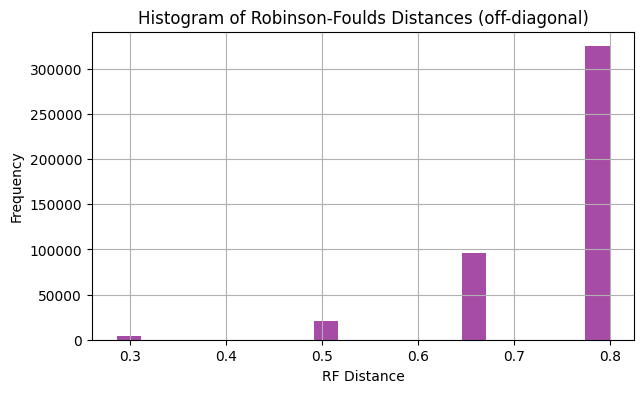

/Users/berksakalli/Library/Caches/pypoetry/virtualenvs/brancharchitect-V3Oy3FqG-py3.12/lib/python3.12/site-packages/umap/umap_.py:1178: RuntimeWarning: invalid value encountered in divide
  R = (ro - np.mean(ro)) / np.std(ro)


In [3]:
rf_matrix = np.zeros((max_trees, max_trees), dtype=float)

for i in range(max_trees):
    for j in range(i):
        rf: float = relative_robinson_foulds_distance(trees[i], trees[j])
        rf_matrix[i, j] = rf
        rf_matrix[j, i] = rf

fig, ax = plt.subplots(figsize=(8, 6))
plot_distance_matrix(rf_matrix, ax=ax, title="Robinson-Foulds Distance Matrix")
plt.show()
plt.figure(figsize=(7,4))
plt.hist(rf_matrix[np.triu_indices(max_trees, 1)], bins=20, color='purple', alpha=0.7)
plt.title('Histogram of Robinson-Foulds Distances (off-diagonal)')
plt.xlabel('RF Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
rf_embedding = perform_umap(rf_matrix)
plot_component_umap_3d(rf_embedding, cluster_labels= None, title="UMAP of RF Distances")